# 基础
+ 认识网页
    + 组成
        + header:存放元信息(title)
        + body
+ 使用python登陆网页
+ 匹配网页内容

In [1]:
from urllib.request import urlopen

# if has Chinese, apply decode()
html = urlopen(
    "https://mofanpy.com/static/scraping/basic-structure.html"
).read().decode('utf-8')
print(html)

<!DOCTYPE html>
<html lang="cn">
<head>
	<meta charset="UTF-8">
	<title>Scraping tutorial 1 | 莫烦Python</title>
	<link rel="icon" href="{{ static_url }}/js/description/tab_icon.png">
</head>
<body>
	<h1>爬虫测试1</h1>
	<p>
		这是一个在 <a href="/">莫烦Python</a>
		<a href="/tutorials/data-manipulation/scraping/">爬虫教程</a> 中的简单测试.
	</p>

</body>
</html>


In [2]:
import re
res = re.findall(r"<title>(.+?)</title>", html)
print("\nPage title is: ", res[0])

# Page title is:  Scraping tutorial 1 | 莫烦Python


Page title is:  Scraping tutorial 1 | 莫烦Python


# BeautifulSoup

## 基础

In [11]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

# if has Chinese, apply decode()
html = urlopen("https://morvanzhou.github.io/static/scraping/basic-structure.html").read().decode('utf-8')
soup = BeautifulSoup(html,features='lxml')
##通过soup 我们可快速找寻到我们需要的部分<h1> <p> <a1>
print(soup.p)

<p>
		这是一个在 <a href="https://morvanzhou.github.io/">莫烦Python</a>
<a href="https://morvanzhou.github.io/tutorials/data-manipulation/scraping/">爬虫教程</a> 中的简单测试.
	</p>


In [8]:
#如果网页中有过个同样的 tag, 比如链接 <a>, 
# 我们可以使用 find_all() 来找到所有的选项.
all_href = soup.find_all('a')
# 因为我们真正的 link 不是在 <a> 中间 </a>, 而是在 <a href="link"> 里面。
#可以看做是 <a> 的一个属性. 我们能用像 Python 字典的形式, 用 key 来读取 l["href"].
all_href = [l['href'] for l in all_href]
print('\n', all_href)


 [<a href="https://morvanzhou.github.io/">莫烦Python</a>, <a href="https://morvanzhou.github.io/tutorials/data-manipulation/scraping/">爬虫教程</a>]


## CSS 
> 美化网页的工具

In [17]:
# 按照class匹配
from bs4 import BeautifulSoup
from urllib.request import urlopen

# if has Chinese, apply decode()
html = urlopen("https://morvanzhou.github.io/static/scraping/list.html").read().decode('utf-8')
soup = BeautifulSoup(html,features='lxml')
# use class to narrow search
month = soup.find_all('li', {"class": "month"})
for m in month:
    print(m.get_text())
jan = soup.find('ul', {"class": 'jan'})
d_jan = jan.find_all('li')              # use jan as a parent
for d in d_jan:
    print(d.get_text())

一月
二月
三月
四月
五月
一月一号
一月二号
一月三号


## 正则匹配

In [29]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import re

# if has Chinese, apply decode()
html = urlopen("https://morvanzhou.github.io/static/scraping/table.html").read().decode('utf-8')
soup = BeautifulSoup(html,features="lxml")
#查找页面中jpg格式的图片
# re.compile()生成的是正则对象，单独使用没有任何意义
#需要和findall(), search(), match(）搭配使用
imag_links = soup.find_all("img",{"src":re.compile('.*?\.jpg')})
for link in imag_links:
    print(link['src'])

https://morvanzhou.github.io/static/img/course_cover/tf.jpg
https://morvanzhou.github.io/static/img/course_cover/rl.jpg
https://morvanzhou.github.io/static/img/course_cover/scraping.jpg


# 正则表达式
+ 灵活匹配
    + [ab]
    + [a-z] [A-Z] [0-9a-z]
+ 类型匹配
    + re.search(flags=re.M)
+ 重复匹配
    + \* : 重复零次或多次
    + \+ : 重复一次或多次
    + {n, m} : 重复 n 至 m 次
    + {n} : 重复 n 次
+ 分组
    + re.search().group()
+ 一些函数
    + re.findall 找到全部匹配项 |--or
    + re.sub() 替换
    + re.split()
    + re.compile() re.compile()生成的是正则对象，单独使用没有任何意义，需要和findall(), search(), match(）搭配使用

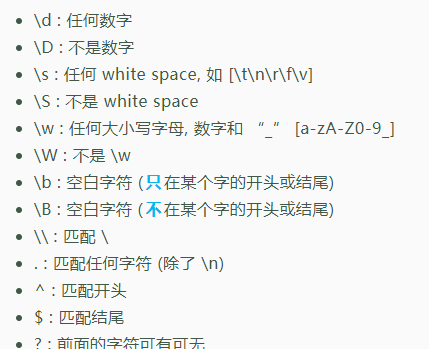

In [19]:
import re
# \d : decimal digit
print(re.search(r"r\dn", "run r4n"))           # <_sre.SRE_Match object; span=(4, 7), match='r4n'>
# \D : any non-decimal digit
print(re.search(r"r\Dn", "run r4n"))           # <_sre.SRE_Match object; span=(0, 3), match='run'>
# \s : any white space [\t\n\r\f\v]
print(re.search(r"r\sn", "r\nn r4n"))          # <_sre.SRE_Match object; span=(0, 3), match='r\nn'>
# \S : opposite to \s, any non-white space
print(re.search(r"r\Sn", "r\nn r4n"))          # <_sre.SRE_Match object; span=(4, 7), match='r4n'>
# \w : [a-zA-Z0-9_]
print(re.search(r"r\wn", "r\nn r4n"))          # <_sre.SRE_Match object; span=(4, 7), match='r4n'>
# \W : opposite to \w
print(re.search(r"r\Wn", "r\nn r4n"))          # <_sre.SRE_Match object; span=(0, 3), match='r\nn'>
# \b : empty string (only at the start or end of the word)
print(re.search(r"\bruns\b", "dog runs to cat"))    # <_sre.SRE_Match object; span=(4, 8), match='runs'>
# \B : empty string (but not at the start or end of a word)
print(re.search(r"\B runs \B", "dog   runs  to cat"))  # <_sre.SRE_Match object; span=(8, 14), match=' runs '>
# \\ : match \
print(re.search(r"runs\\", "runs\ to me"))     # <_sre.SRE_Match object; span=(0, 5), match='runs\\'>
# . : match anything (except \n)
print(re.search(r"r.n", "r[ns to me"))         # <_sre.SRE_Match object; span=(0, 3), match='r[n'>
# ^ : match line beginning
print(re.search(r"^dog", "dog runs to cat"))   # <_sre.SRE_Match object; span=(0, 3), match='dog'>
# $ : match line ending
print(re.search(r"cat$", "dog runs to cat"))   # <_sre.SRE_Match object; span=(12, 15), match='cat'>
# ? : may or may not occur
print(re.search(r"Mon(day)?", "Monday"))       # <_sre.SRE_Match object; span=(0, 6), match='Monday'>
print(re.search(r"Mon(day)?", "Mon"))          # <_sre.SRE_Match object; span=(0, 3), match='Mon'>

<re.Match object; span=(4, 7), match='r4n'>
<re.Match object; span=(0, 3), match='run'>
<re.Match object; span=(0, 3), match='r\nn'>
<re.Match object; span=(4, 7), match='r4n'>
<re.Match object; span=(4, 7), match='r4n'>
<re.Match object; span=(0, 3), match='r\nn'>
<re.Match object; span=(4, 8), match='runs'>
<re.Match object; span=(5, 11), match=' runs '>
<re.Match object; span=(0, 5), match='runs\\'>
<re.Match object; span=(0, 3), match='r[n'>
<re.Match object; span=(0, 3), match='dog'>
<re.Match object; span=(12, 15), match='cat'>
<re.Match object; span=(0, 6), match='Monday'>
<re.Match object; span=(0, 3), match='Mon'>


In [20]:
# 使用()进行分组
# group(1)定位我们需要返回哪个组里的信息
match = re.search(r"(\d+), Date: (.+)", "ID: 021523, Date: Feb/12/2017")
print(match.group())                   # 021523, Date: Feb/12/2017
print(match.group(1))                  # 021523
print(match.group(2))                  # Date: Feb/12/2017

021523, Date: Feb/12/2017
021523
Feb/12/2017


In [ ]:
# ?P<名字> 对组标写名称
match = re.search(r"(?P<id>\d+), Date: (?P<date>.+)", "ID: 021523, Date: Feb/12/2017")
print(match.group('id'))                # 021523
print(match.group('date'))              # Date: Feb/12/2017

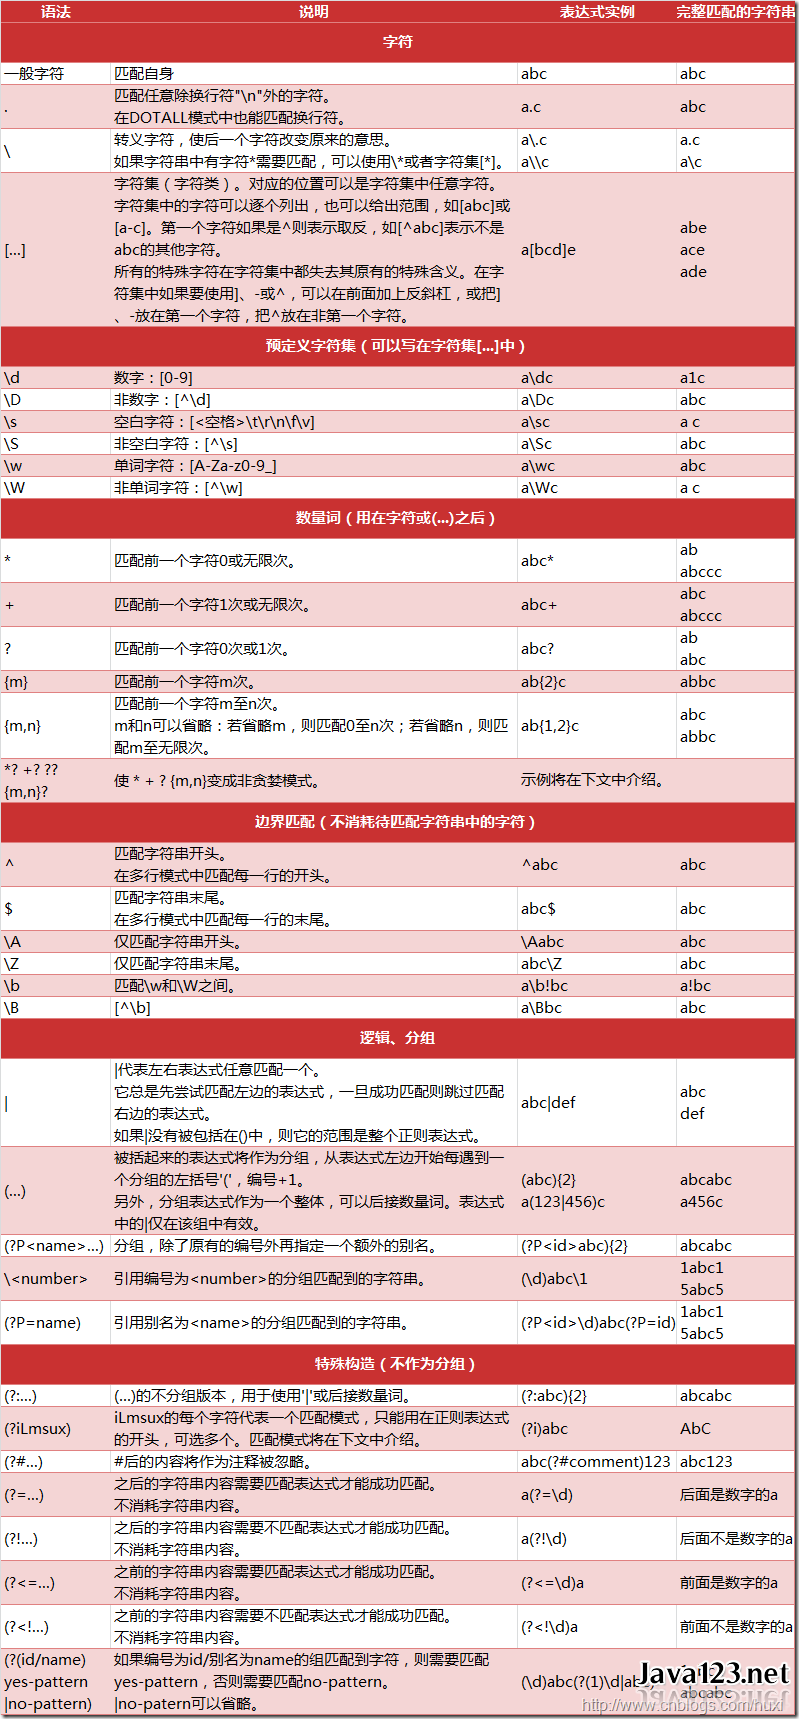